### Work left to do

##### 1(Abdul). Create a script that queries the Google Books API for each book in the books_data.csv dataset and retrieves the pageCount and averageRating fields from the response and adds them as columns to the enhanced_books_data.csv

##### Expected columns: book_title, page_count, average_rating 

##### 2(Joseph). Sentiment analysis of the review/text to produce a column with either a positive(1) or negative(1) sentiment; said column can be used as a feature in a ML model

##### 3. Four models have been built

###### 1. Linear regression - Joseph draft 
###### 2. K-nearest neighbors - Joseph draft 
###### 3. _ model - Brian 
###### 4. _ model - Griffin 

##### 4(everyone). Analysis and Evaluation of model performance/model comparison

##### 5(everyone). Lessons learned/things we would do differently/things we would do if we had more time 

# Everyone should be working in a single notebook. 

In [24]:
import re

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder


books_file_path = 's3://cap4770-2024summer12/books_data.csv'
book_ratings_path = 's3://cap4770-2024summer12/Books_rating.csv'

In [6]:
books = pd.read_csv(books_file_path, usecols=["Title", "publishedDate"])
books = books.dropna()

books["publishedDate"] = books["publishedDate"].str.strip()
books["publishedDate"] = books["publishedDate"].apply(lambda x: None if re.search(r'\d{4}', str(x)) is None else re.search(r'\d{4}', str(x)).group(0))

books = books.dropna()

books.rename(columns={'Title': 'title', 'publishedDate': 'date_published'}, inplace=True)
books['date_published'] = books['date_published'].astype(int)

In [7]:
book_ratings = pd.read_csv(book_ratings_path, usecols=["User_id", "Title", "Price", "review/score"])
book_ratings.rename(columns={'User_id': 'user_id', 'Title': 'title', "Price": "price", 'review/score': 'rating'}, inplace=True)
book_ratings = book_ratings.dropna()

# Linear regression

In [258]:
X_train, X_test, y_train, y_test = train_test_split(book_prices[['price']], book_prices[['rating']], test_size=0.2, random_state=42)

In [260]:
regr = linear_model.LinearRegression()

In [261]:
regr.fit(X_train, y_train)

LinearRegression()

In [262]:
ratings_y_pred = regr.predict(X_test)

In [263]:
print(f"Coefficients: {regr.coef_}")
print(f"Mean squared error: {mean_squared_error(y_test, ratings_y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, ratings_y_pred)}")

Coefficients: 
 [[-0.00043176]]
Mean squared error: 1.46
Coefficient of determination: 0.00


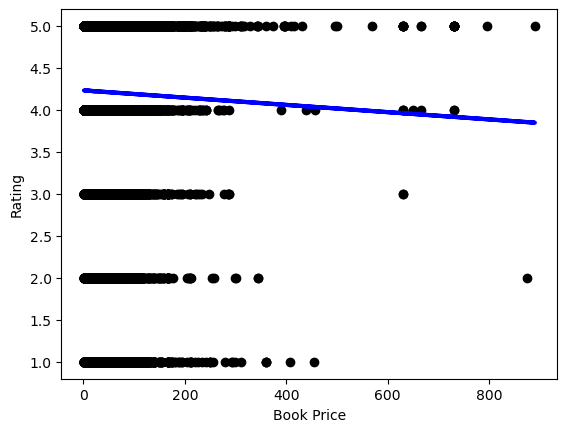

In [266]:
plt.scatter(X_test, y_test, color="black")
plt.xlabel('Book Price')
plt.ylabel('Rating')
plt.plot(X_test, ratings_y_pred, color="blue", linewidth=3)

# K-nearest neighbors 

In [281]:
price_year_rating = book_prices.merge(books, on='title', how='inner')[['price', 'date_published', 'rating']]

In [297]:
X_train, X_test, y_train, y_test = train_test_split(price_year_rating[['price', 'date_published']], price_year_rating[['rating']], test_size=0.2, random_state=42)

In [299]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [300]:
neigh.score(X_test, y_test)

-0.3344073361003823

In [304]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 17), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best r2 score:", grid_search.best_score_)

Best params: {'n_neighbors': 16, 'weights': 'uniform'}
Best cross-validation score: 0.021101124882383627


# K-nearest neighbors(user_id, title, price, date_published)

In [9]:
book_ratings.head()

,title,price,user_id,rating
10,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,5.0
11,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,5.0
12,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,5.0
13,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,5.0
14,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,1.0


In [10]:
user_id_title_date_rating = book_ratings.merge(books, on='title', how='inner')[["user_id", "title", "date_published", "rating"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(user_id_title_date_rating[["user_id", "title", "date_published"]], user_id_title_date_rating[['rating']], test_size=0.2, random_state=42)

In [32]:
X_train_test = X_train[0:5000]

In [33]:
y_train_test = y_train[0:5000]

In [34]:
X_train_test = X_train_test.join(pd.get_dummies(X_train_test['user_id'], dtype='int')).drop(columns='user_id')

In [35]:
X_train_test = X_train_test.join(pd.get_dummies(X_train_test['title'], dtype='int')).drop(columns='title')

In [30]:
X_train_test

,date_published,A10BQ0EVAFGC1M,A10CFLE4VK1CPU,A10FCMO3UNGJAV,A10NXZI25UUWFC,A1158BIMCDW03Z,A11CGZFTAIINVE,A11P1889KKG3VW,A11XX2TBSN9Y93,A122GIAX9OS26X,...,Writing With Sources: A Guide for Students,Year of Wonders (Turtleback School & Library Binding Edition),You Matter More Than You Think: What a Woman Needs to Know About the Difference She Makes,You and Your Puppy: Training and Health Care For Puppy's First Year (Howell Reference Books),Zanesville: A Novel,Zen Shorts (Caldecott Honor Book),Zen and the Art of Stand-Up Comedy,Zeno's Conscience (Everyman's Library Classics & Contemporary Classics),Zhouyi: A New Translation with Commentary of the Book of Changes (Durham East Asia Series),Zondervan NIV Nave's Topical Bible
65298,2005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271031,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338007,2000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350955,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197759,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259216,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35345,2005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51766,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215207,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train_test.dtypes

rating    float64
dtype: object

In [36]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 17), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_test, y_train_test)

print("Best params:", grid_search.best_params_)
print("Best r2 score:", grid_search.best_score_)

Best params: {'n_neighbors': 16, 'weights': 'distance'}
Best r2 score: -0.06947164667320038


Index(['date_published', 'A08075661XH11KY8YRM6M', 'A100VQNP6I54HS',
       'A103N743K663AC', 'A106GGUYFEK2NW', 'A10856Z98KXP0A', 'A108FI0HVVXRMZ',
       'A10925G9D49HLE', 'A10A7YSSNOUECQ', 'A10ATBAKR7OIEE',
       ...
       'Zen in the Martial Arts',
       'Zeno's Conscience (Everyman's Library Classics & Contemporary Classics)',
       'Zero to Sixty: The Motorcycle Journey of a Lifetime',
       'Zhouyi: A New Translation with Commentary of the Book of Changes (Durham East Asia Series)',
       'Zombie00', 'Zondervan KJV Study Bible, Large Print',
       'Zondervan NIV Nave's Topical Bible',
       'Zora Neale Hurston : Novels and Stories : Jonah's Gourd Vine / Their Eyes Were Watching God / Moses, Man of the Mountain / Seraph on the Suwanee / Selected Stories (Library of America)',
       'comeback - a mother and daughter's journey through hell and back',
       'the Picture of Dorian Gray'],
      dtype='object', length=8509)